In [5]:
import matplotlib
print(matplotlib.__version__)

3.8.2


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

/home/rakesh/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
dset = pd.read_csv("IRIS.csv")

## Pre-processing

In [9]:
dset

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [10]:
dset.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [11]:
missing_values = dset.isna().sum()
print("Number of missing values:")
print(missing_values)

Number of missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [12]:
dset.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [13]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
species = dset["species"].unique()
species_count = dset["species"].nunique()
print(f"There are {species_count} species")
print(species)

There are 3 species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### Number of samples of each type

In [15]:
print(dset["species"].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## Feature Extraction

In [16]:
features = dset.drop(["species"], axis=1)
features

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

## Visualization

In [17]:
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder

In [18]:
dset["species_id"] = LabelEncoder().fit_transform(dset["species"])

In [19]:
fig1 = px.bar(dset, x="species", y="petal_width", color ="species_id" ,labels={'x': "Species", 'y': "Petal width"})
fig2 = px.bar(dset, x="species", y="petal_length", color ="species_id" ,labels={'x': "Species", 'y': "Petal length"})
fig3 = px.bar(dset, y="species", x="sepal_width", color ="species_id" ,labels={'x': "Species", 'y': "Sepal width"})
fig4 = px.bar(dset, y="species", x="sepal_length", color ="species_id" ,labels={'x': "Species", 'y': "Sepal length"})

#### Defining sub-plot attributes

In [20]:
subplot_fig = make_subplots(rows=2, cols=2, subplot_titles=('Petal Width by Species', 
                                                            'Petal Length by Species', 
                                                            'Sepal Length by Species', 
                                                            'Sepal Width by Species'))

#### Making subplots

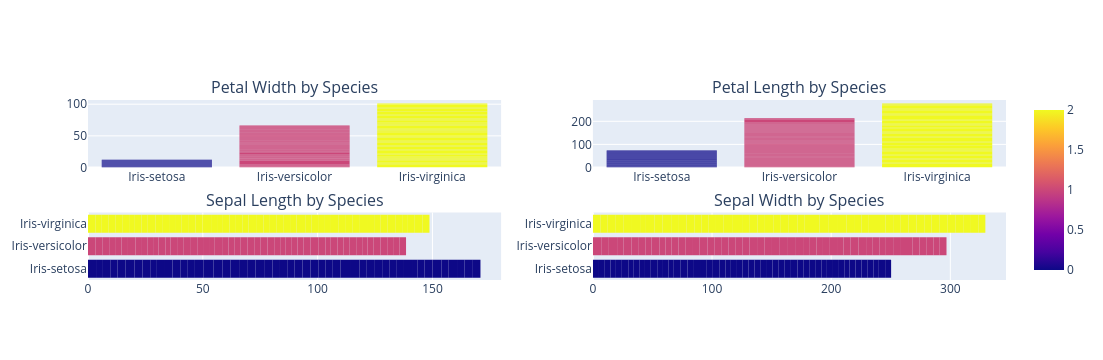

In [21]:
subplot_fig.add_trace(fig1['data'][0], row=1, col=1)
subplot_fig.add_trace(fig2['data'][0], row=1, col=2)
subplot_fig.add_trace(fig3['data'][0], row=2, col=1)
subplot_fig.add_trace(fig4['data'][0], row=2, col=2)

subplot_fig.update_traces(marker_line_width=0)
subplot_fig.show()

<Axes: xlabel='species', ylabel='petal_width'>

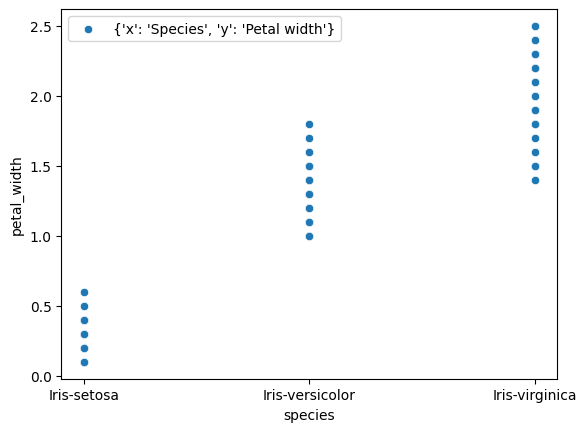

In [22]:
sns.scatterplot(data= dset, x="species", y="petal_width", label={'x': "Species", 'y': "Petal width"})

<Axes: xlabel='species', ylabel='petal_length'>

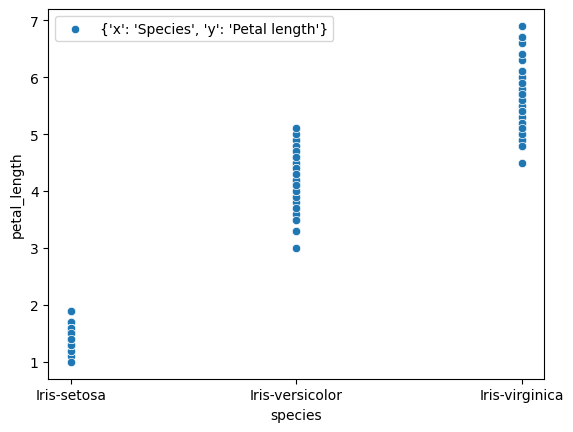

In [23]:
sns.scatterplot(data= dset, x="species", y="petal_length", label={'x': "Species", 'y': "Petal length"})

<Axes: xlabel='species', ylabel='sepal_width'>

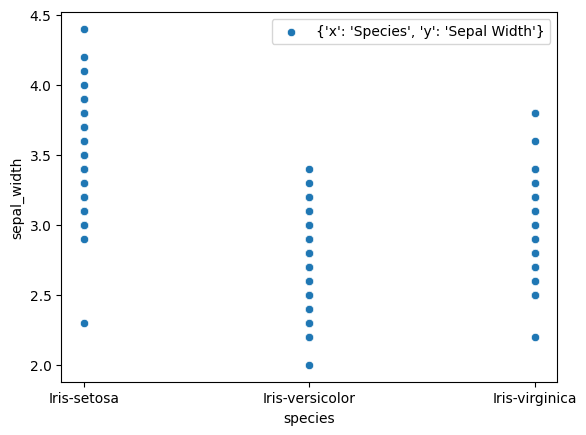

In [24]:
sns.scatterplot(data= dset, x="species", y="sepal_width", label={'x': "Species", 'y': "Sepal Width"})

<Axes: xlabel='species', ylabel='sepal_length'>

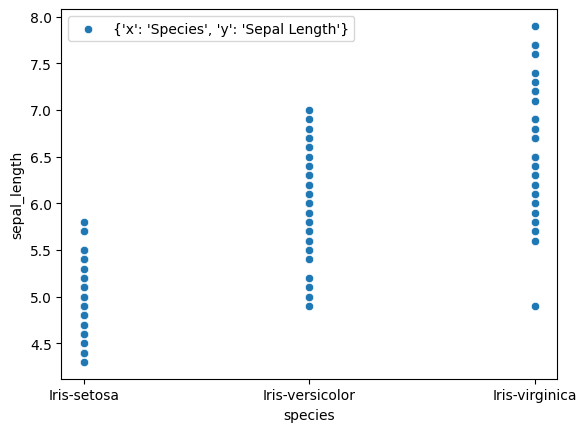

In [25]:
sns.scatterplot(data= dset, x="species", y="sepal_length", label={'x': "Species", 'y': "Sepal Length"})

### Single-variable analysis (univariate analysis)

#### For this let us split the dataset into three groups.

In [26]:
iris_setosa = dset.loc[dset["species"]== "Iris-setosa"]
iris_versicolor = dset.loc[dset["species"]== "Iris-versicolor"]
iris_virginica = dset.loc[dset["species"]== "Iris-virginica"]

Using FacetGrid for plotting multiple categorial values

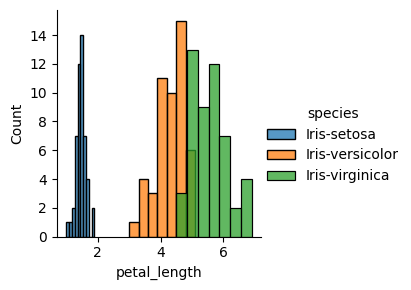

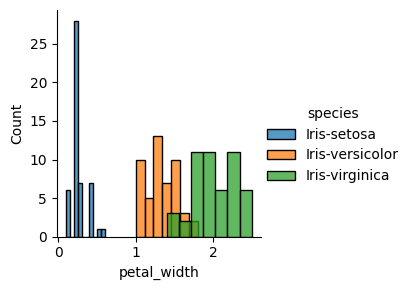

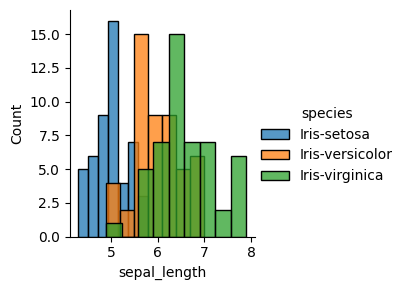

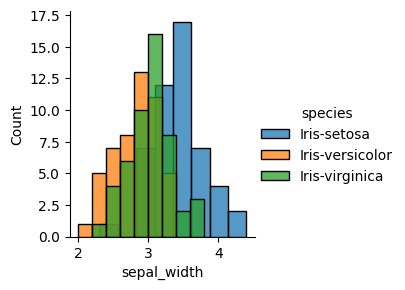

In [27]:
sns.FacetGrid(dset, hue="species").map(sns.histplot, "petal_length").add_legend()
sns.FacetGrid(dset, hue="species").map(sns.histplot, "petal_width").add_legend()
sns.FacetGrid(dset, hue="species").map(sns.histplot, "sepal_length").add_legend()
sns.FacetGrid(dset, hue="species").map(sns.histplot, "sepal_width").add_legend()
plt.show()

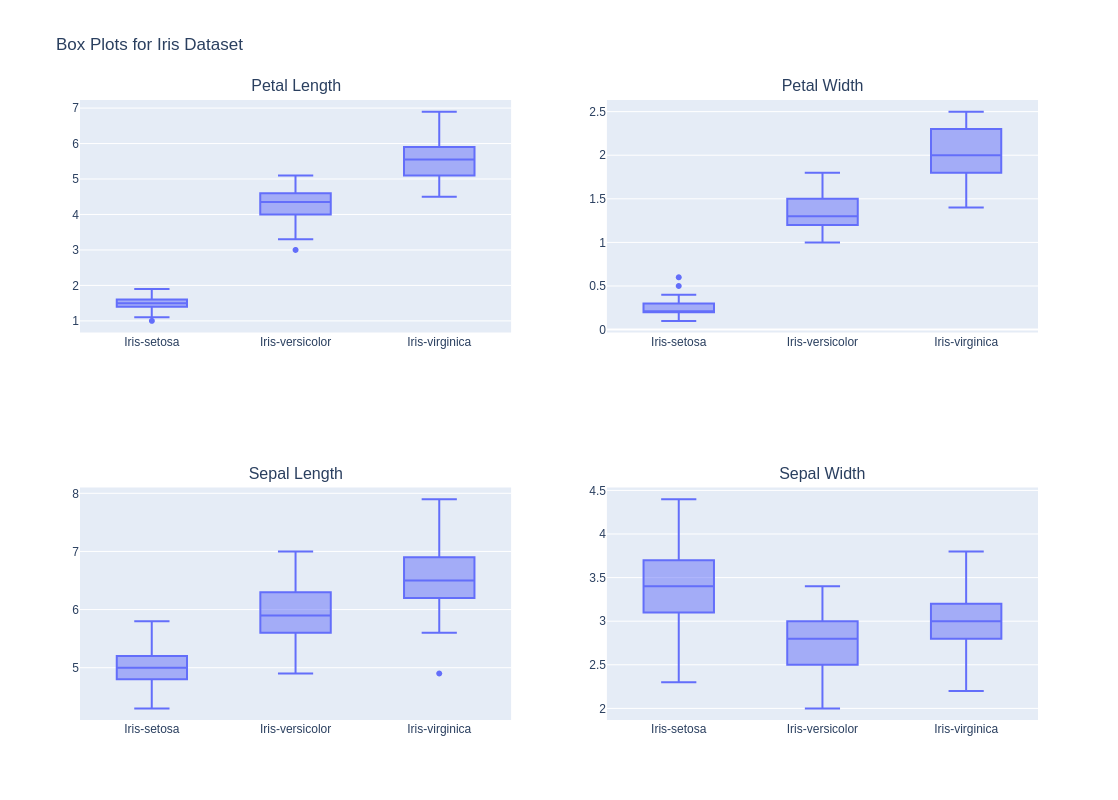

In [28]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Petal Length", "Petal Width", "Sepal Length", "Sepal Width"))

# Add box plots to each subplot
fig.add_trace(px.box(dset, x="species", y="petal_length").data[0], row=1, col=1)
fig.add_trace(px.box(dset, x="species", y="petal_width").data[0], row=1, col=2)
fig.add_trace(px.box(dset, x="species", y="sepal_length").data[0], row=2, col=1)
fig.add_trace(px.box(dset, x="species", y="sepal_width").data[0], row=2, col=2)

# Update layout for better presentation
fig.update_layout(
    title_text="Box Plots for Iris Dataset",
    showlegend=True,
    height=800,  # Adjust the height of the entire figure
    width=1200   # Adjust the width of the entire figure
)
fig.show()

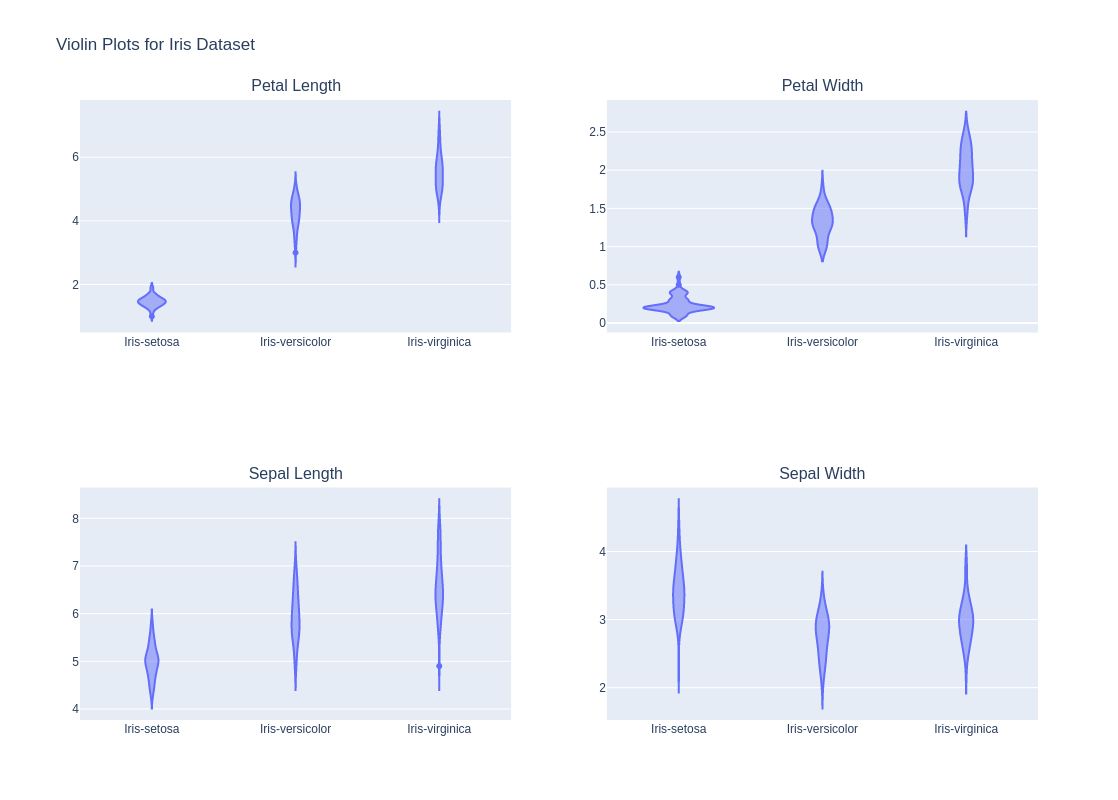

In [29]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Petal Length", "Petal Width", "Sepal Length", "Sepal Width"))

# Add box plots to each subplot
fig.add_trace(px.violin(dset, x="species", y="petal_length").data[0], row=1, col=1)
fig.add_trace(px.violin(dset, x="species", y="petal_width").data[0], row=1, col=2)
fig.add_trace(px.violin(dset, x="species", y="sepal_length").data[0], row=2, col=1)
fig.add_trace(px.violin(dset, x="species", y="sepal_width").data[0], row=2, col=2)

# Update layout for better presentation
fig.update_layout(
    title_text="Violin Plots for Iris Dataset",
    showlegend=True,
    height=800,  # Adjust the height of the entire figure
    width=1200   # Adjust the width of the entire figure
)
fig.show()

## Pair Plot

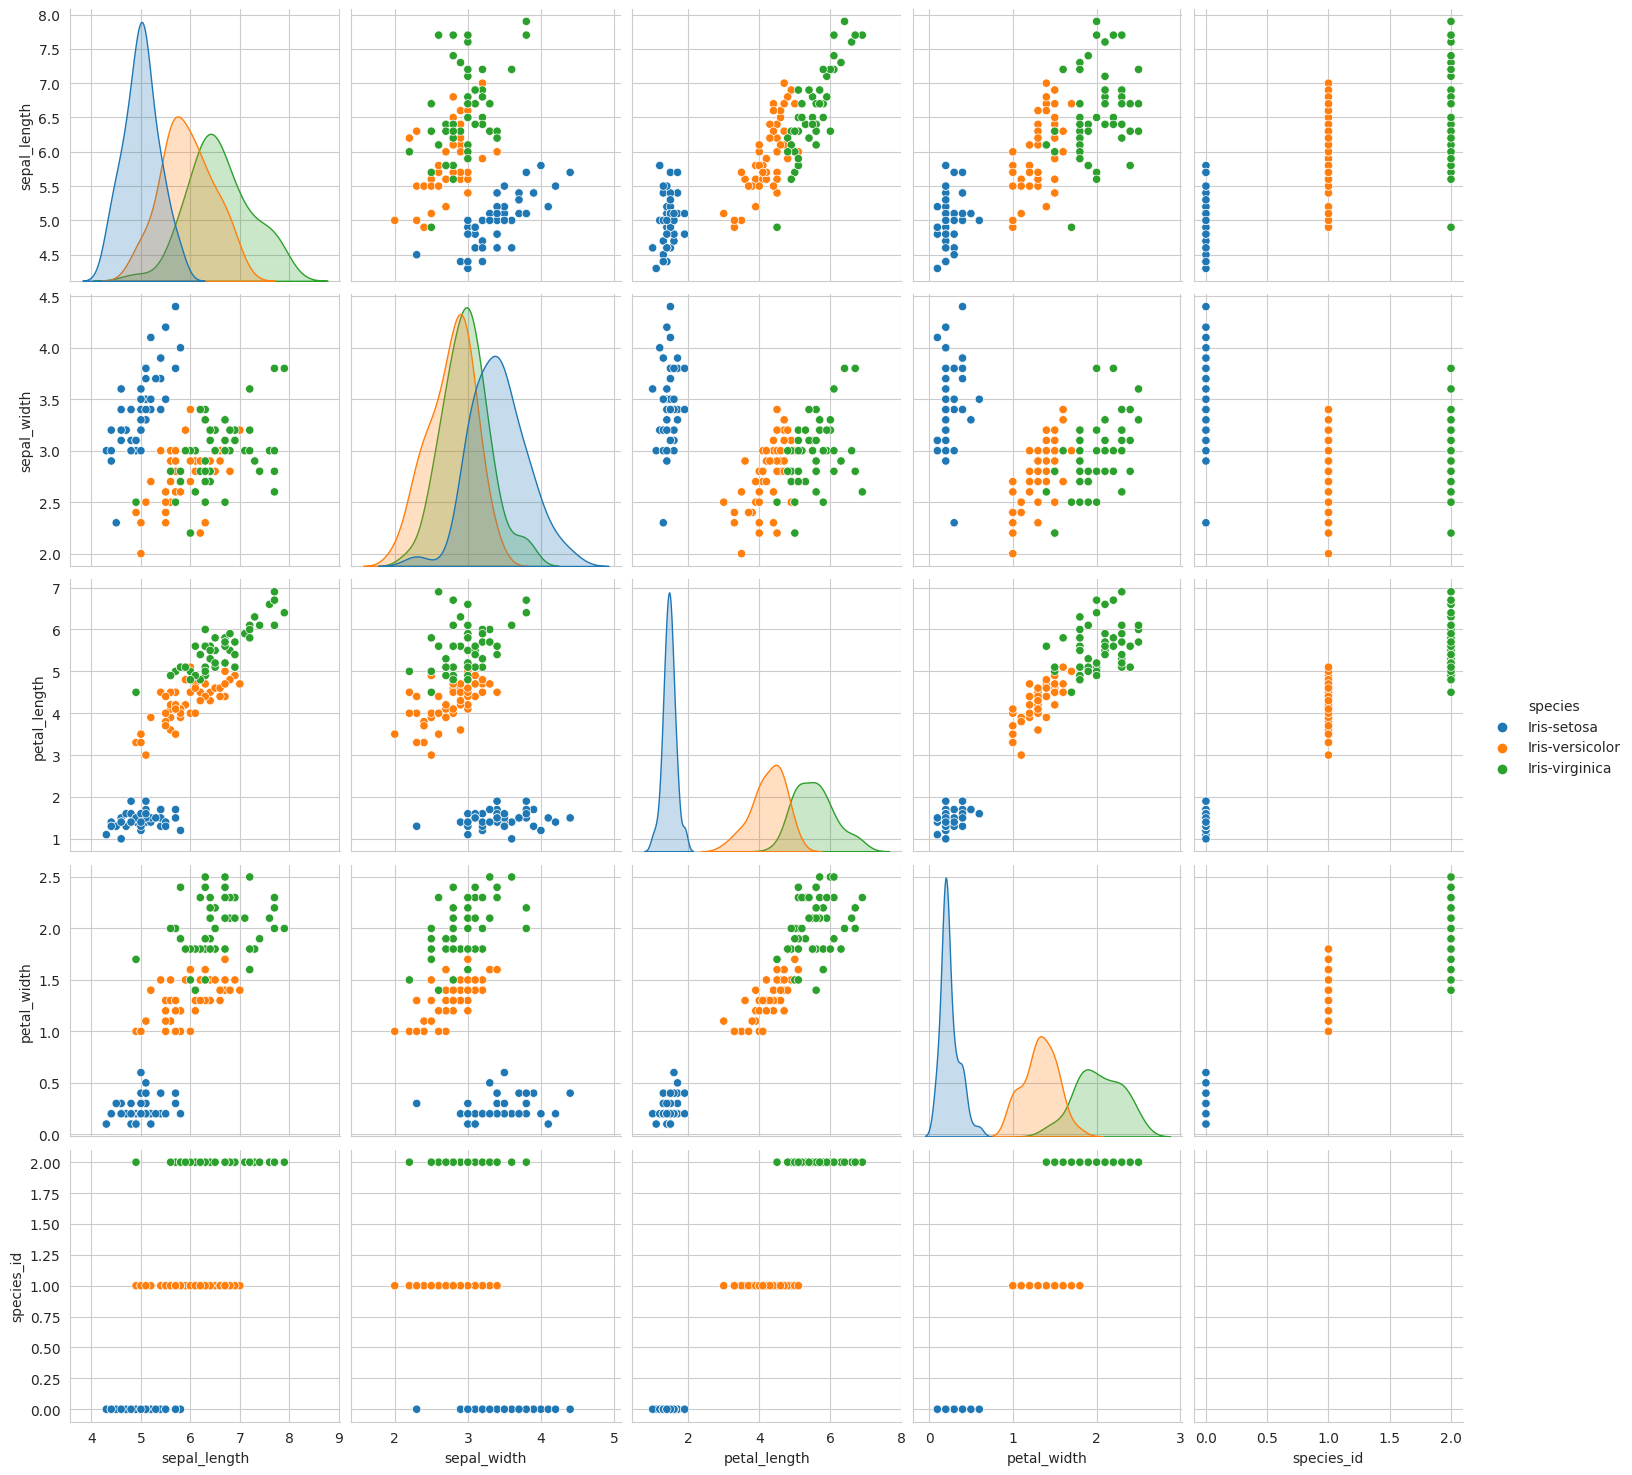

In [30]:
sns.set_style("whitegrid")
sns.pairplot(dset, hue="species", height=3)
plt.show()

## Correlation matrix

In [31]:
features.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

### We can see that iris-setosa is linearly seperable from latter two. However, the latter two(iris-versicolor and iris-verginica) are not linearly seperable from each other.

### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
dset['species'] = le.fit_transform(dset['species'])
dset.head()

sepal_length  sepal_width  petal_length  petal_width  species  species_id
0           5.1          3.5           1.4          0.2        0           0
1           4.9          3.0           1.4          0.2        0           0
2           4.7          3.2           1.3          0.2        0           0
3           4.6          3.1           1.5          0.2        0           0
4           5.0          3.6           1.4          0.2        0           0

## Test and Train

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
label = dset['species']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [37]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
# model training
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
# print metric to get the performance
print("Accuracy:", model.score(X_test, y_test)*100)

Accuracy: 100.0


In [40]:
#  KNN (K-Nearest-Neighbour)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [41]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
print("Accuracy:", model.score(X_test, y_test)*100)

Accuracy: 100.0


In [43]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
print("Accuracy:", model.score(X_test, y_test)*100)

Accuracy: 100.0
